## CASK FR1 Correct Rate

In [1]:
import sys
sys.path.insert(0, '../scripts')

import os
from accuracy import graph_cumulative_acc, read_and_record, graph_single_stats
from intervals import perform_T_test
from path import fr1_female_path, fr1_female_sheets

export_root = '../export/Figure 2/'
os.makedirs(export_root, exist_ok=True)
male_ending_corr = []
female_ending_corr = []
male_learned_time = []
female_learned_time = []
male_acc_dict = {}
female_acc_dict = {}

## Female Group

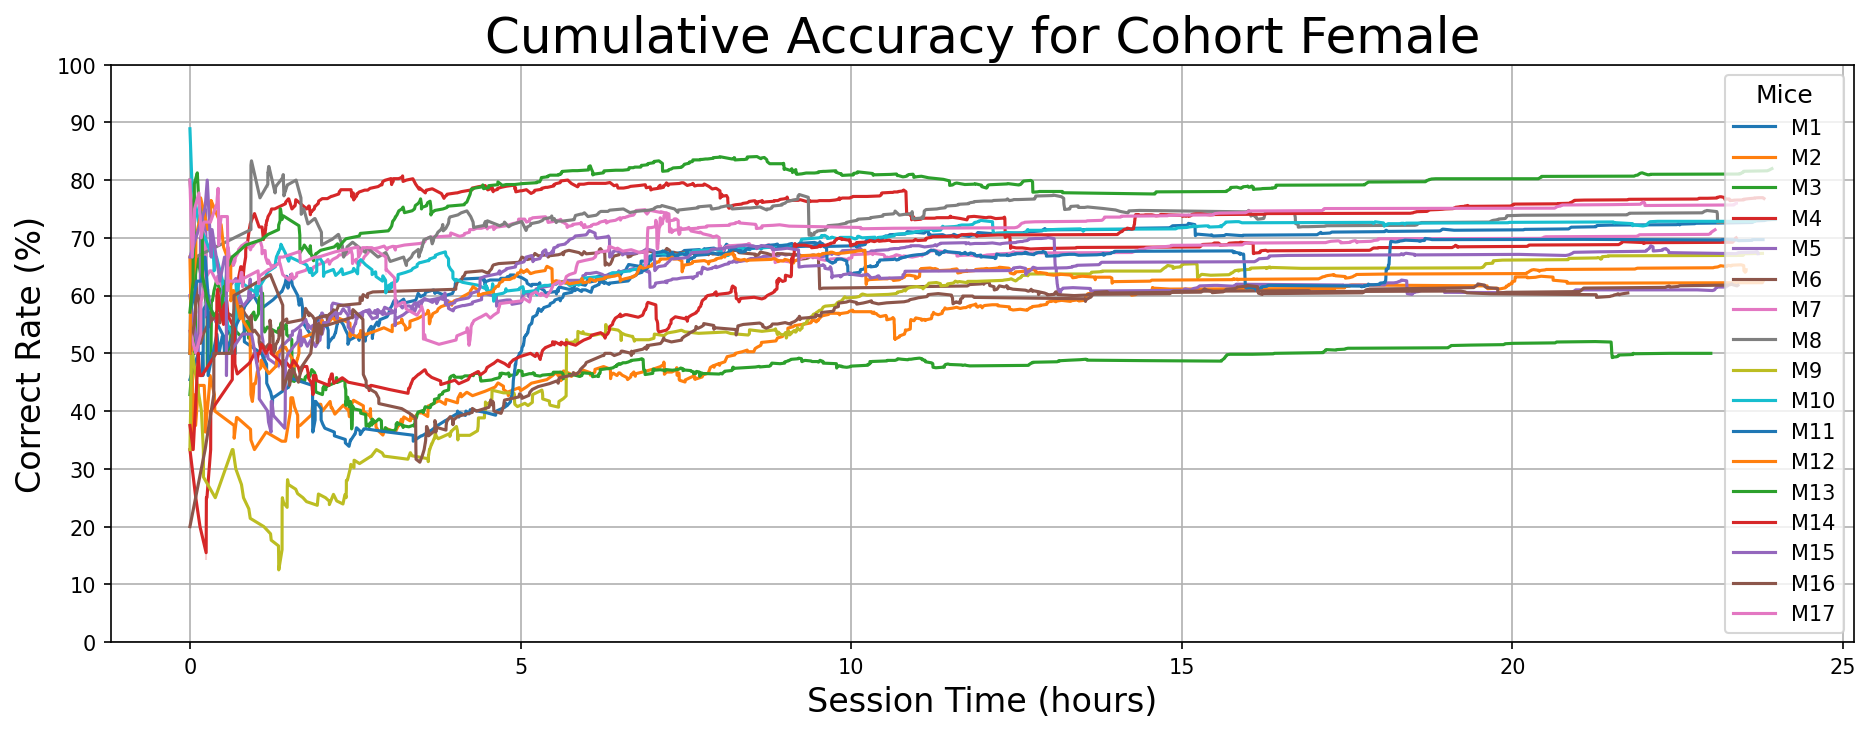

In [2]:
# R2M7 has false time signatures
group_data = []

for sheet in fr1_female_sheets:
    try:
        data = read_and_record(path=fr1_female_path, sheet=sheet, 
                            ending_corr=female_ending_corr, 
                            learned_time=female_learned_time,
                            acc_dict=female_acc_dict)
        group_data.append(data)
    except ValueError:
        continue
graph_cumulative_acc(group_data, 'Female', export_path=os.path.join(export_root, f'Female_FR1_Accuracy.svg'))

### Analysis

#### Time need to reach 80% for 2 cont. hours

Female Size: 17
Female Average: 4.913921568627451
Female Standard Error: 0.8166043324538307


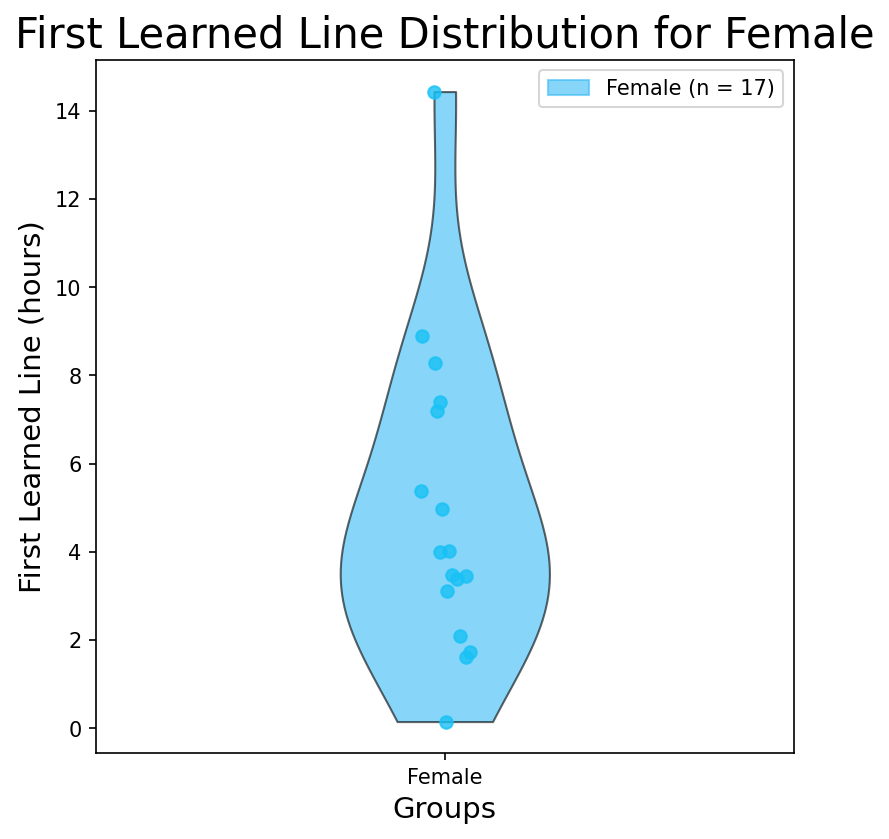

In [3]:
graph_single_stats(female_learned_time, group_name='Female', stats_name='First Learned Line', unit='hours', violin_width=0.3,
                  export_path=os.path.join(export_root, 'WT_FirstLearnedLine_barplot.svg'))

In [5]:
import pickle
pickle.dump((male_acc_dict, female_acc_dict), open('../data/wt_fr1_acc.pkl', 'wb'))

#### Ctrl/Cask Ending/Overall Correct Rate

Female Size: 17
Female Average: 68.27975202236696
Female Standard Error: 1.7989542553792979


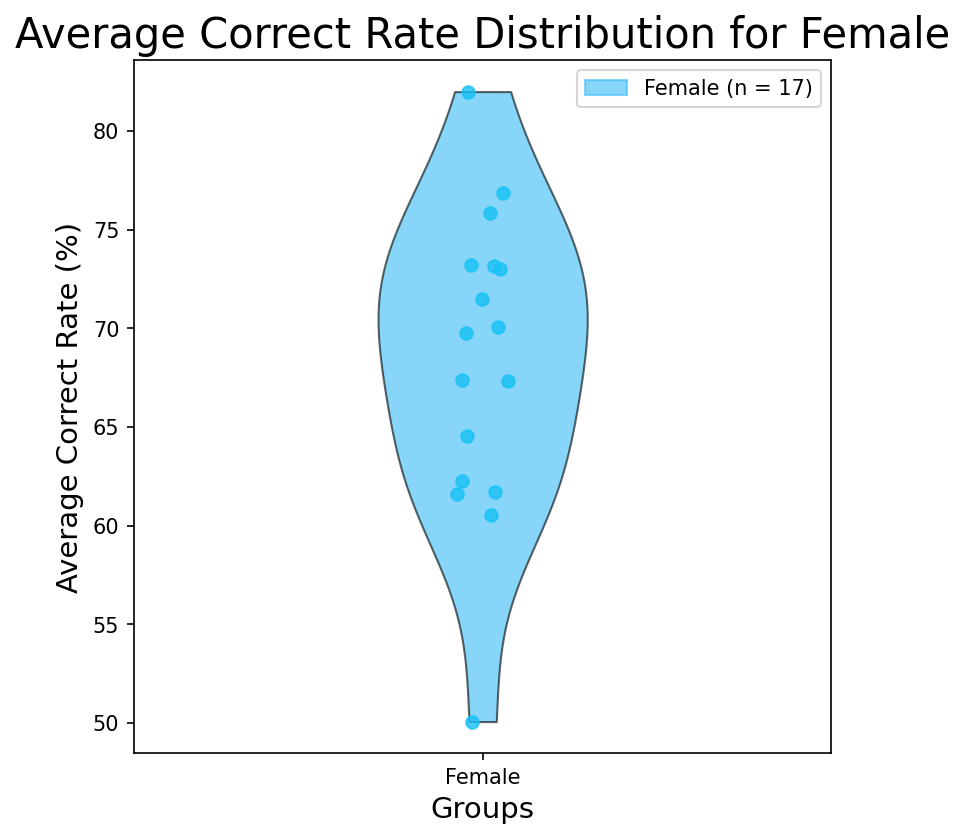

In [4]:
graph_single_stats(female_ending_corr, group_name='Female', stats_name='Average Correct Rate', unit='%', violin_width=0.3,
                  export_path=os.path.join(export_root, 'WT_accuracy_barplot.svg'))